This dataset focuses on thyroid cancer recurrence after Radioactive Iodine (RAI) therapy. It contains 383 patient records with 13 key attributes, including age, gender, cancer staging, pathology type, risk classification, treatment response, and recurrence status. The data is valuable for predicting cancer recurrence, understanding risk factors, and evaluating treatment outcomes.

📊 Dataset Overview
📌 Total Rows: 383
📌 Total Columns: 13
📌 No Missing Values

🔹 Column Descriptions
Age : Age of the patient (in years).
Gender : Patient's gender (Male or Female).
Hx Radiotherapy : History of prior radiotherapy (Yes or No).
Adenopathy : Presence of lymph node involvement (Yes or No).
Pathology : Type of thyroid cancer (e.g., Micropapillary).
Focality : Tumor focality (Uni-Focal or Multi-Focal).
Risk : Cancer risk classification (Low, Intermediate, High).
T : Tumor classification (T1, T2, etc.).
N : Lymph node classification (N0, N1, etc.).
M : Metastasis classification (M0, M1, etc.).
Stage : Cancer staging (Stage I, II, III, IV).
Response : Treatment response (Excellent, Indeterminate, etc.).
Recurred : Whether cancer recurred (Yes or No).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('filtered_thyroid_data.csv')
df

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [4]:
df.describe()


,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [6]:
df.shape

(383, 13)

In [8]:
df.tail()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [9]:
df.isnull().sum()

,0
Age,0
Gender,0
Hx Radiothreapy,0
Adenopathy,0
Pathology,0
Focality,0
Risk,0
T,0
N,0
M,0


In [10]:
df.duplicated().sum()

np.int64(53)

In [11]:
df.columns

Index(['Age', 'Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [67]:
num = df.select_dtypes(include=np.number)
num.head()

,Age
0,27
1,34
2,30
3,62
4,62


In [66]:
cat = df.select_dtypes(exclude=np.number)
cat.head()

,Gender,Radiotherapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [65]:
df = df.rename(columns={'Hx Radiothreapy': 'Radiotherapy'})
df.columns

Index(['Age', 'Gender', 'Radiotherapy', 'Adenopathy', 'Pathology', 'Focality',
       'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [27]:
gender = df.groupby('Gender')['Radiotherapy'].value_counts()
gender

Gender  Radiotherapy
F       No              311
        Yes               1
M       No               65
        Yes               6
Name: count, dtype: int64

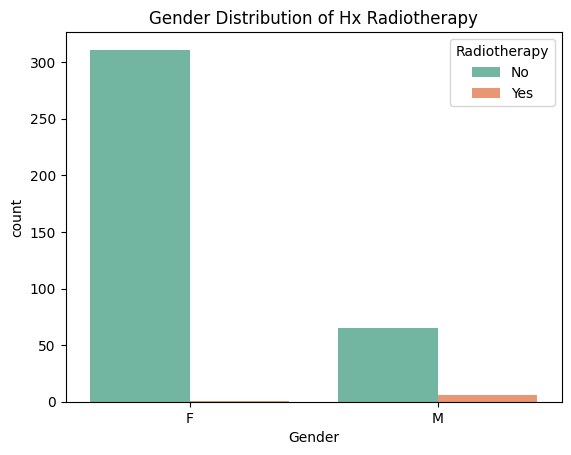

In [26]:
sns.countplot(x='Gender', data=df, hue='Radiotherapy', palette='Set2')
plt.title('Gender Distribution of Hx Radiotherapy')
plt.show()

In [28]:
radiotherapy_adenopathy = df.groupby('Radiotherapy')['Adenopathy'].value_counts()
radiotherapy_adenopathy

Radiotherapy  Adenopathy
No            No            274
              Right          47
              Bilateral      32
              Left           17
              Extensive       4
              Posterior       2
Yes           Extensive       3
              No              3
              Right           1
Name: count, dtype: int64

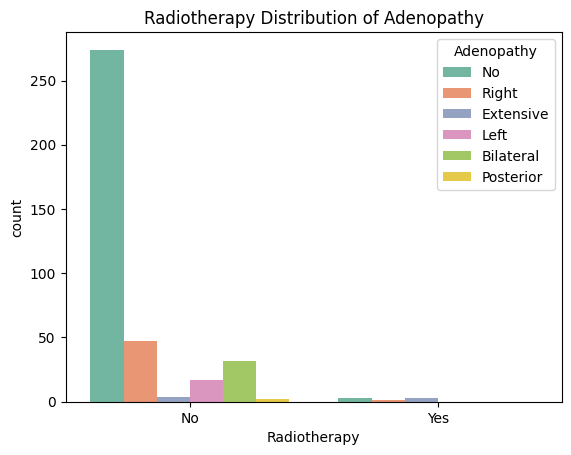

In [37]:
sns.countplot(x='Radiotherapy', data=df, hue='Adenopathy', palette='Set2')
plt.title('Radiotherapy Distribution of Adenopathy')
plt.show()

In [39]:
radiotherapy_pathology = df.groupby('Radiotherapy')['Pathology'].value_counts().unstack()
radiotherapy_pathology


Pathology,Follicular,Hurthel cell,Micropapillary,Papillary
Radiotherapy,,,,
No,26.0,19.0,48.0,283.0
Yes,2.0,1.0,NaN,4.0


Text(0, 0.5, 'Count')

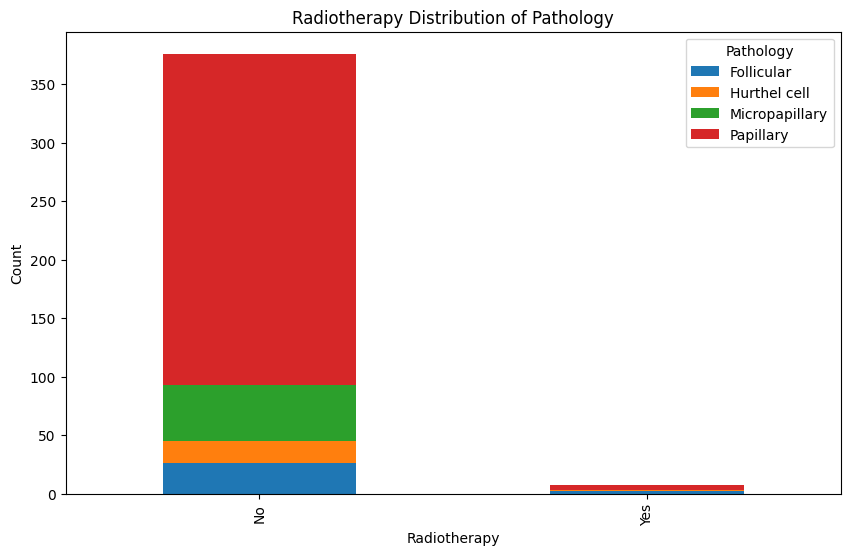

In [40]:
radiotherapy_pathology.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Radiotherapy Distribution of Pathology')
plt.xlabel('Radiotherapy')
plt.ylabel('Count')

In [41]:
cat.columns

Index(['Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology', 'Focality',
       'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

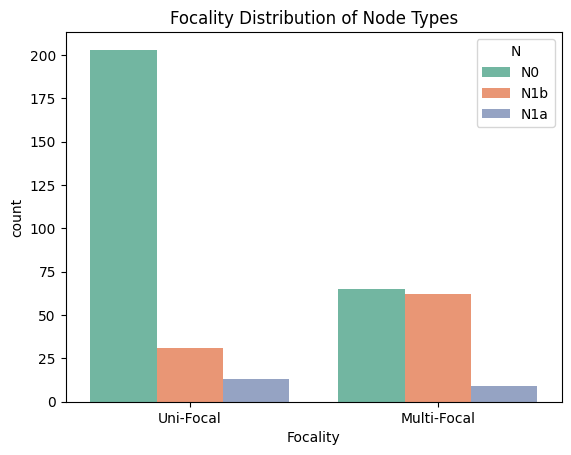

In [47]:
focality = df.groupby('Focality')['N'].value_counts()
focality

sns.countplot(x='Focality', data=df, hue='N', palette='Set2')
plt.title('Focality Distribution of Node Types')
plt.show()

In [43]:
sample = df.sample(100)
sample


,Age,Gender,Radiotherapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
67,51,F,No,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
77,29,F,No,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
233,34,F,No,Right,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
169,40,M,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
314,32,F,No,Left,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
209,38,F,No,Right,Papillary,Multi-Focal,Intermediate,T2,N1b,M0,I,Excellent,No
121,26,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
263,41,F,No,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No


<ipython-input-44-518b9b092b21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk', y='Age', data=df, palette='Set2')


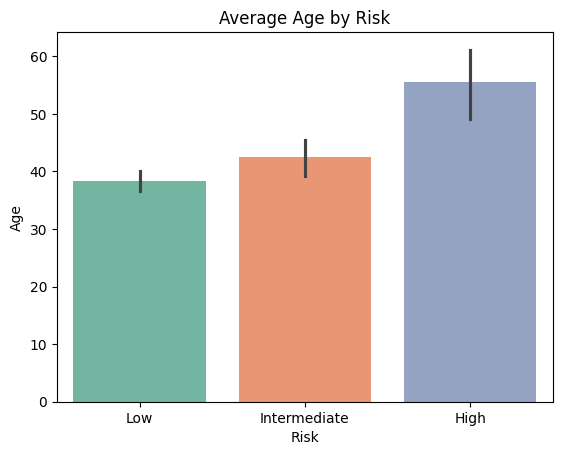

In [44]:
age_risk = df.groupby('Risk')['Age'].mean()
age_risk

sns.barplot(x='Risk', y='Age', data=df, palette='Set2')
plt.title('Average Age by Risk')
plt.show()

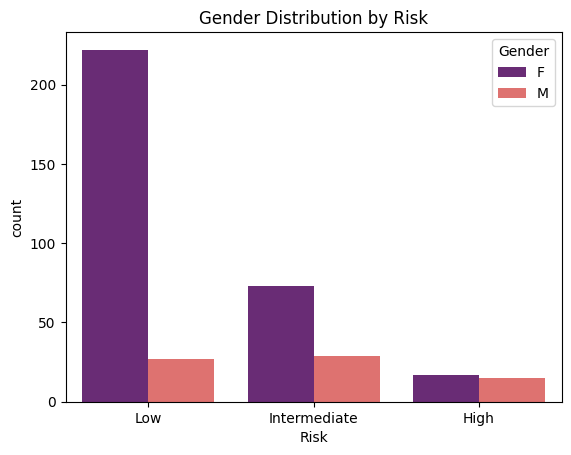

In [46]:
gender_risk = df.groupby('Risk')['Gender'].value_counts()
gender_risk

sns.countplot(x='Risk', data=df, hue='Gender', palette='magma')
plt.title('Gender Distribution by Risk')
plt.show()

<ipython-input-52-c3c4c65b5240>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stage', y='Age', data=df, palette='mako')


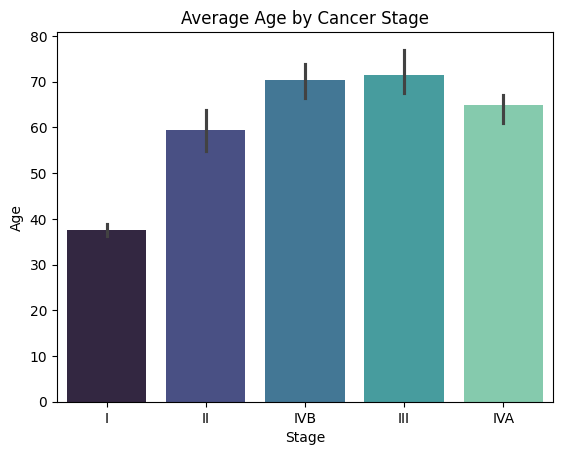

In [52]:
age_stage = df.groupby('Stage')['Age'].mean()
age_stage

sns.barplot(x='Stage', y='Age', data=df, palette='mako')
plt.title('Average Age by Cancer Stage')
plt.show()

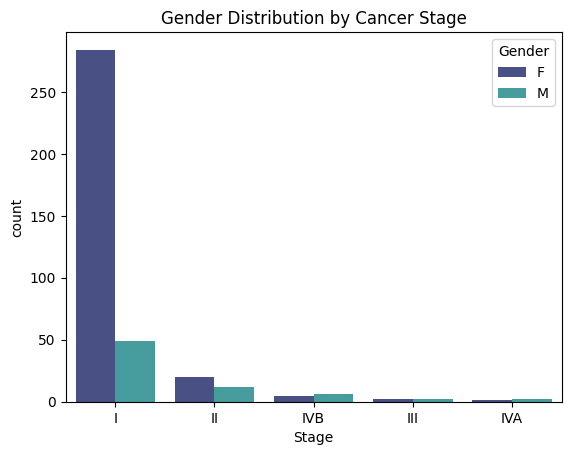

In [53]:
gender_stage = df.groupby('Stage')['Gender'].value_counts()
gender_stage

sns.countplot(x='Stage', data=df, hue='Gender', palette='mako')
plt.title('Gender Distribution by Cancer Stage')
plt.show()

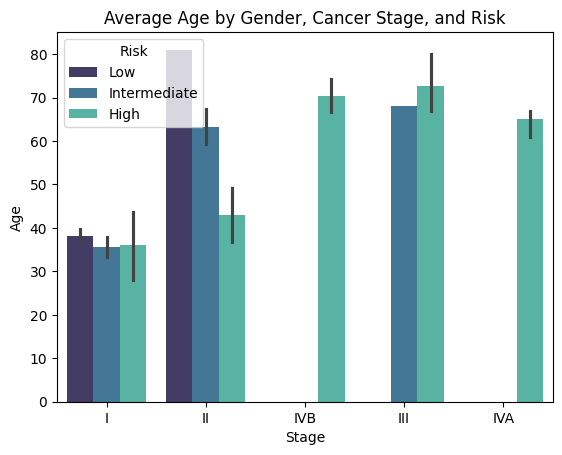

In [55]:
gender_stage_age_risk = df.groupby(['Gender', 'Stage', 'Risk'])['Age'].mean()
gender_stage_age_risk.unstack()

sns.barplot(x='Stage', y='Age', hue='Risk', data=df, palette='mako')
plt.title('Average Age by Gender, Cancer Stage, and Risk')
plt.show()

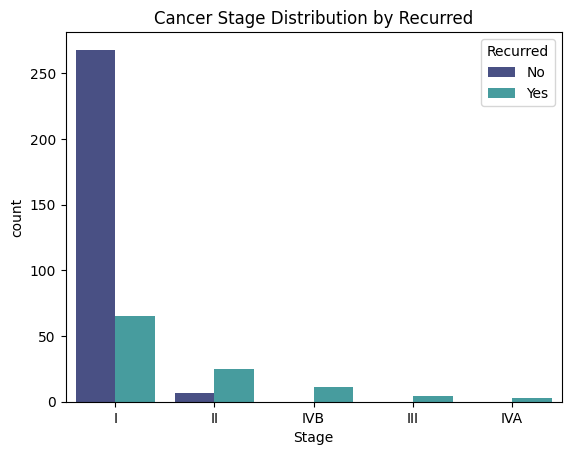

In [56]:
stage_recurred = df.groupby('Stage')['Recurred'].value_counts()
stage_recurred

sns.countplot(x='Stage', data=df, hue='Recurred', palette='mako')
plt.title('Cancer Stage Distribution by Recurred')
plt.show()

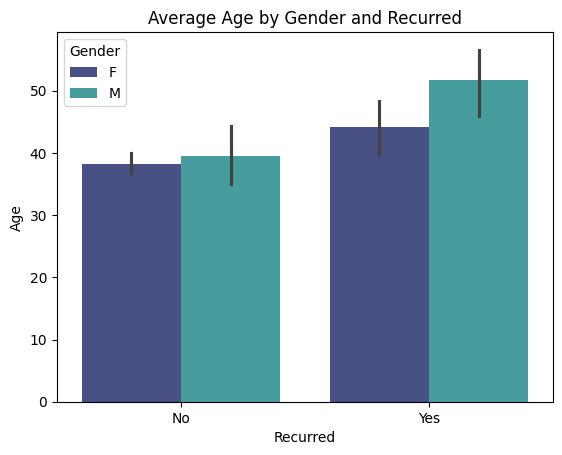

In [59]:
age_gender_recurred = df.groupby(['Gender', 'Recurred'])['Age'].mean()
age_gender_recurred.unstack()

sns.barplot(x='Recurred', y='Age', hue='Gender', data=df, palette='mako')
plt.title('Average Age by Gender and Recurred')
plt.show()

In [68]:
cat.columns

Index(['Gender', 'Radiotherapy', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

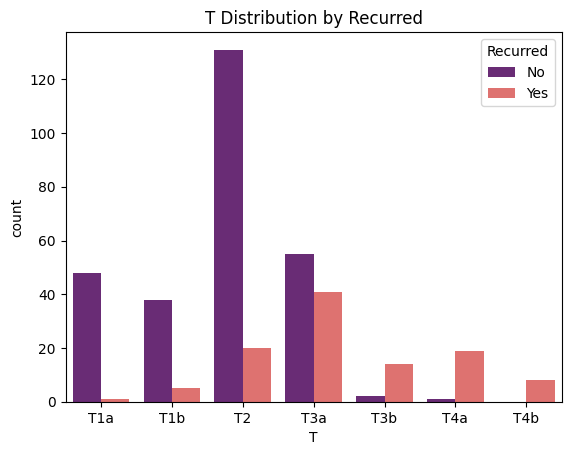

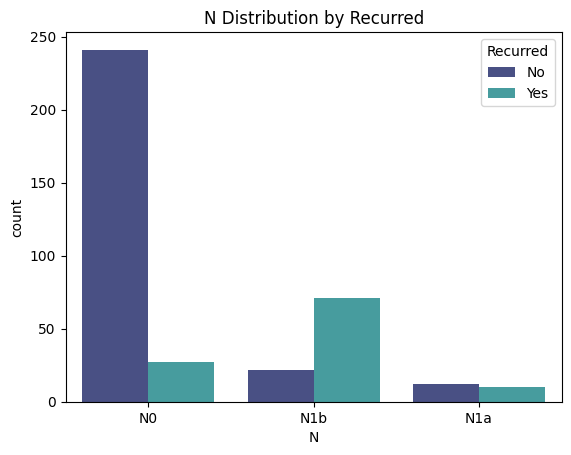

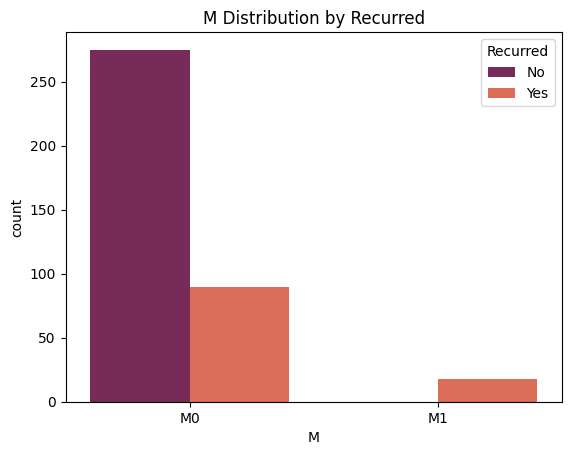

In [72]:
T_N_M = df.groupby(['T', 'N', 'M'])['Recurred'].value_counts()
T_N_M

sns.countplot(x='T', data=df, hue='Recurred', palette='magma')
plt.title('T Distribution by Recurred')
plt.show()

sns.countplot(x='N', data=df, hue='Recurred', palette='mako')
plt.title('N Distribution by Recurred')
plt.show()

sns.countplot(x='M', data=df, hue='Recurred', palette='rocket')
plt.title('M Distribution by Recurred')
plt.show()

<ipython-input-73-37691b8b2685>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Recurred', y='Age', data=df, palette='mako')


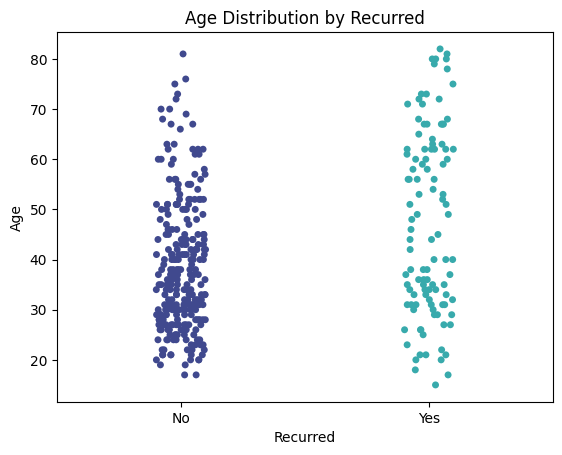

In [73]:
sns.stripplot(x='Recurred', y='Age', data=df, palette='mako')
plt.title('Age Distribution by Recurred')
plt.show()

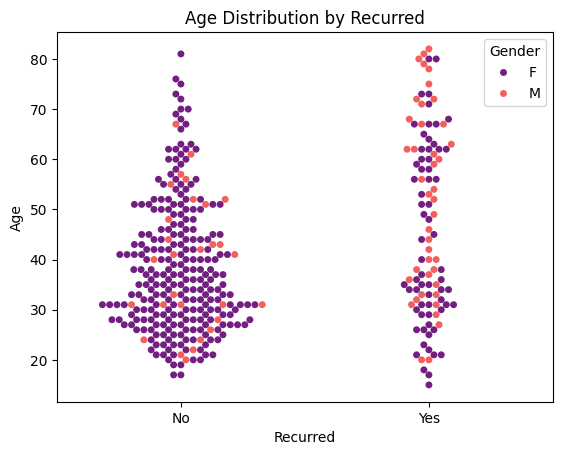

In [76]:
sns.swarmplot(x='Recurred', y='Age', hue='Gender', data=df, palette='magma')
plt.title('Age Distribution by Recurred')
plt.show()

<ipython-input-78-193e1c77c363>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Recurred', y='Age', data=df, palette='mako')


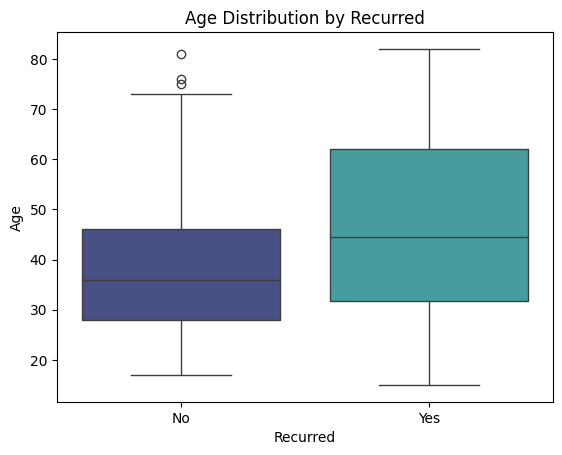

In [78]:
sns.boxplot(x='Recurred', y='Age', data=df, palette='mako')
plt.title('Age Distribution by Recurred')
plt.show()

<ipython-input-79-f1cd8f377072>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='T', y='Age', data=df, palette='mako')


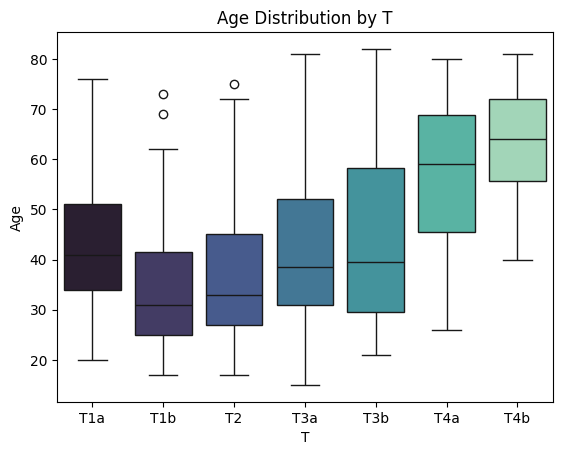

In [79]:
sns.boxplot(x='T', y='Age', data=df, palette='mako')
plt.title('Age Distribution by T')
plt.show()

<ipython-input-80-a65c6b0d6168>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='N', y='Age', data=df, palette='mako')


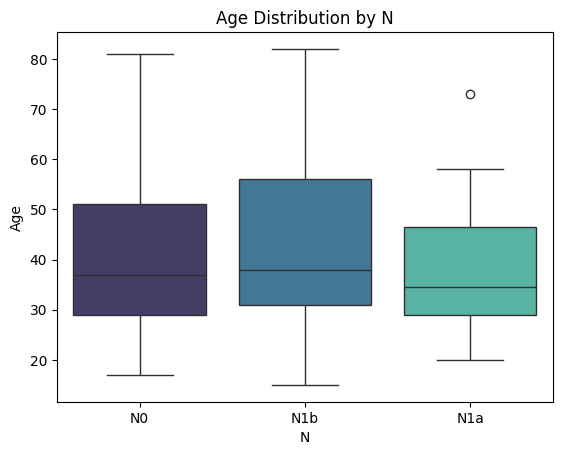

In [80]:
sns.boxplot(x='N', y='Age', data=df, palette='mako')
plt.title('Age Distribution by N')
plt.show()

<ipython-input-81-359a16a57dc5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='M', y='Age', data=df, palette='mako')


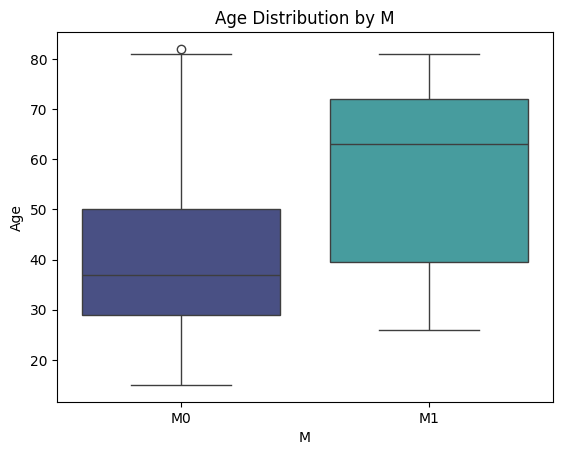

In [81]:
sns.boxplot(x='M', y='Age', data=df, palette='mako')
plt.title('Age Distribution by M')
plt.show()

<ipython-input-82-858646ad4884>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y='Age', data=df, palette='mako')


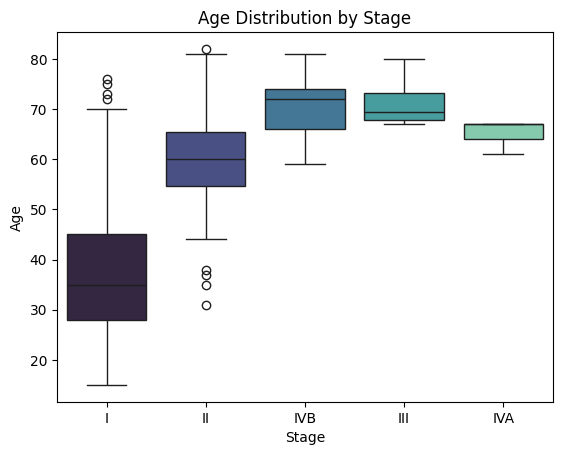

In [82]:
sns.boxplot(x='Stage', y='Age', data=df, palette='mako')
plt.title('Age Distribution by Stage')
plt.show()

<ipython-input-83-ff0e7b1800df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Recurred', y='Age', data=df, palette='mako')


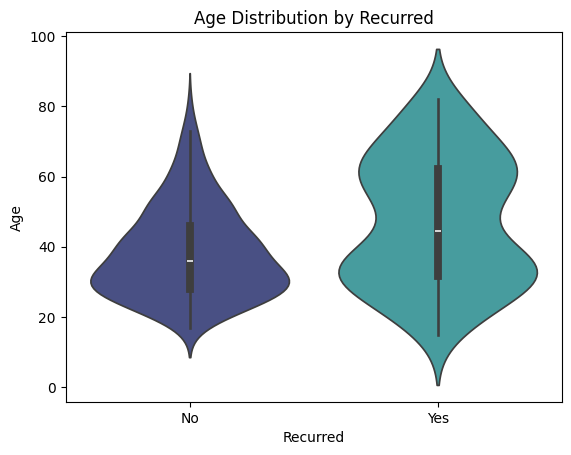

In [83]:
sns.violinplot(x='Recurred', y='Age', data=df, palette='mako')
plt.title('Age Distribution by Recurred')
plt.show()


<ipython-input-84-6c0b34fcef9b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='T', y='Age', data=df, palette='mako')


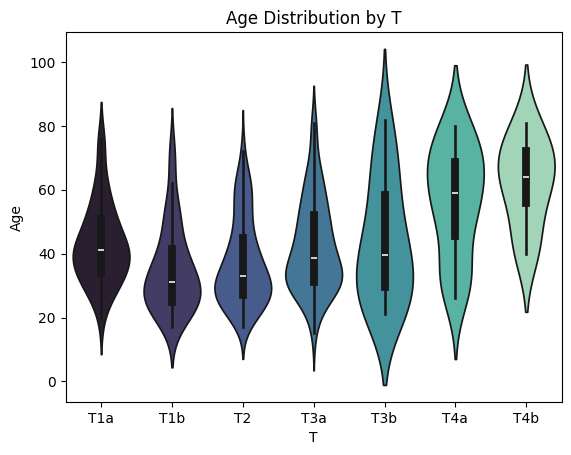

In [84]:
sns.violinplot(x='T', y='Age', data=df, palette='mako')
plt.title('Age Distribution by T')
plt.show()

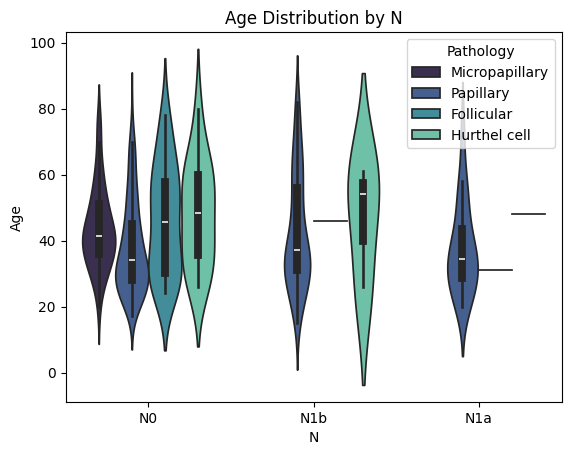

In [89]:
sns.violinplot(x='N', y='Age', data=df, hue='Pathology', palette='mako')
plt.title('Age Distribution by N')
plt.show()

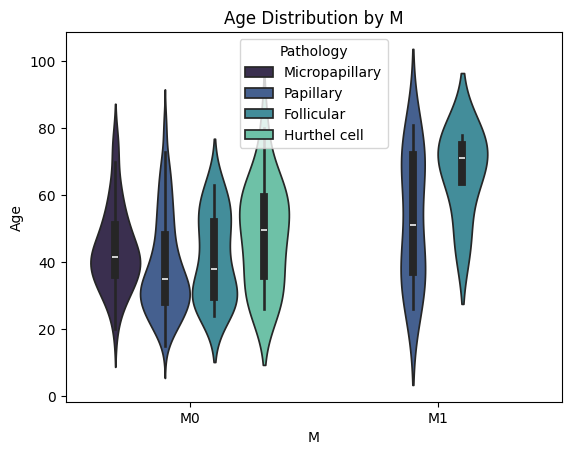

In [88]:
sns.violinplot(x='M', y='Age', hue='Pathology', data=df, palette='mako')
plt.title('Age Distribution by M')
plt.show()
